In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats

In [2]:
# Store filepath in a variable
OPTN_data = Path("Resources/cleaned_OPTN_data.csv")

# read the file - AP
kidney_data = pd.read_csv(OPTN_data)

kidney_data.head()

,State,Total,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years,Payment type,Blood type,Age,Ethnicity,Sex
0,Alabama,455,9,22,61,101,146,73,54,40,NaN,NaN,NaN,NaN,Female
1,Alabama,713,16,38,87,150,237,135,95,43,NaN,NaN,NaN,NaN,Male
2,Alabama,787,5,7,72,169,267,146,97,48,Public insurance - Medicare FFS (Fee for Service),NaN,NaN,NaN,NaN
3,Alabama,688,9,32,88,154,215,122,93,57,NaN,NaN,NaN,"Black, Non-Hispanic",NaN
4,Alabama,631,14,30,80,136,209,124,81,46,NaN,O,NaN,NaN,NaN


In [3]:
# ignoring commas

kidney_data["Total"] = kidney_data["Total"].str.replace(",", "")
kidney_data["< 30 days"] = kidney_data["< 30 days"].str.replace(",", "")
kidney_data["30 to < 90 days"] = kidney_data["30 to < 90 days"].str.replace(",", "")
kidney_data["90 days to < 6 months"] = kidney_data["90 days to < 6 months"].str.replace(",", "")
kidney_data["6 months to < 1 year"] = kidney_data["6 months to < 1 year"].str.replace(",", "")
kidney_data["1 year to < 2 years"] = kidney_data["1 year to < 2 years"].str.replace(",", "")
kidney_data["2 years to < 3 years"] = kidney_data["2 years to < 3 years"].str.replace(",", "")
kidney_data["3 years to < 5 years"] = kidney_data["3 years to < 5 years"].str.replace(",", "")
kidney_data["> 5 years"] = kidney_data["> 5 years"].str.replace(",", "")

In [4]:
# need to type total and wait time columns as integers
kidney_data["Total"] = kidney_data["Total"].astype(int)
kidney_data["< 30 days"] = kidney_data["< 30 days"].astype(int)
kidney_data["30 to < 90 days"] = kidney_data["30 to < 90 days"].astype(int)
kidney_data["90 days to < 6 months"] = kidney_data["90 days to < 6 months"].astype(int)
kidney_data["6 months to < 1 year"] = kidney_data["6 months to < 1 year"].astype(int)
kidney_data["1 year to < 2 years"] = kidney_data["1 year to < 2 years"].astype(int)
kidney_data["2 years to < 3 years"] = kidney_data["2 years to < 3 years"].astype(int)
kidney_data["3 years to < 5 years"] = kidney_data["3 years to < 5 years"].astype(int)
kidney_data["> 5 years"] = kidney_data["> 5 years"].astype(int)

In [5]:
# testing
# variable = kidney_data.loc[(kidney_data["Sex"] == "Female") & (kidney_data["State"] == "Oklahoma"), "Total"].values[0]
# variable

### Oklahoma

In [6]:
# Total candidates for Oklahoma

ok_totals1 = kidney_data.loc[kidney_data["State"] == "Oklahoma"]
ok_male_totals = ok_totals1.loc[ok_totals1["Sex"] == "Male"]["Total"].values[0]
ok_female_totals = ok_totals1.loc[ok_totals1["Sex"] == "Female"]["Total"].values[0]
ok_totals = ok_male_totals + ok_female_totals
ok_totals

597

In [7]:
# Need to get wait time values for each blood type 

# Total for each blood type

ok_blood_type_O = ok_totals1.loc[ok_totals1["Blood type"] == "O"]["Total"].values[0]
ok_blood_type_A = ok_totals1.loc[ok_totals1["Blood type"] == "A"]["Total"].values[0]
ok_blood_type_B = ok_totals1.loc[ok_totals1["Blood type"] == "B"]["Total"].values[0]
ok_blood_type_AB = ok_totals1.loc[ok_totals1["Blood type"] == "AB"]["Total"].values[0]
print(ok_blood_type_O)
print(ok_blood_type_A)
print(ok_blood_type_B)
print(ok_blood_type_AB)

341
188
65
3


In [8]:
# Testing

#type_O_wait1 = ok_totals1.loc[ok_totals1["Blood type"] == "O"]["< 30 days"].values[0]
#type_O_wait1


In [9]:
# Creating blood type vs wait time dataframe

ok_blood_type_wait = pd.DataFrame(ok_totals1[["Blood type","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_blood_type_wait

,Blood type,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1067,O,16,24,39,64,82,70,48,15
1071,A,14,15,21,46,47,25,15,7
1078,B,3,9,7,13,13,8,9,5
1088,AB,0,0,1,0,1,1,0,0


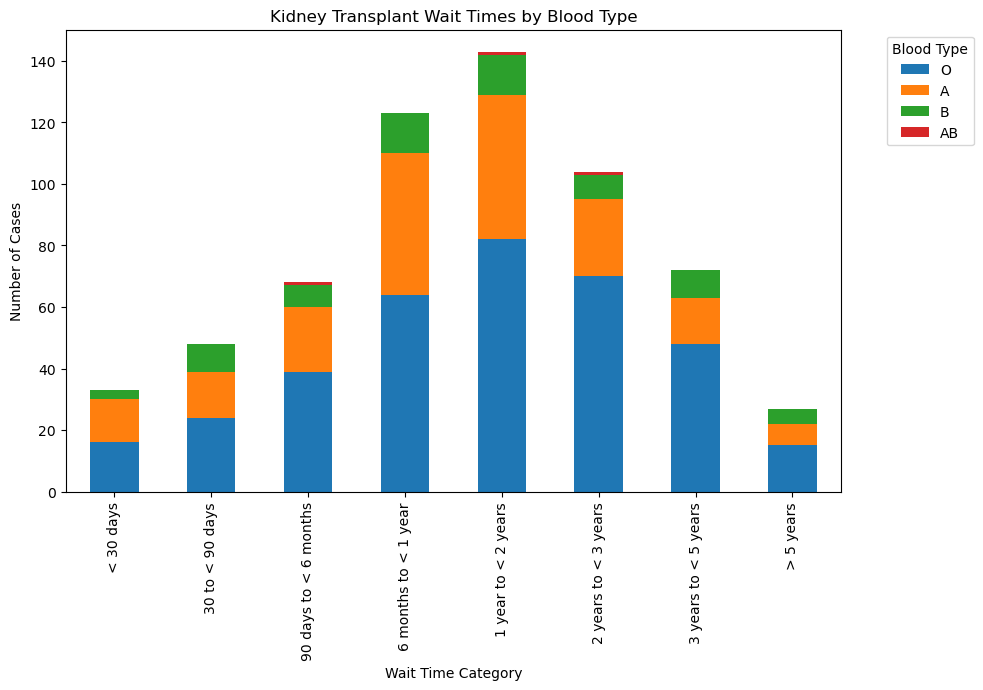

In [18]:
# Plot above on bar chart

# Set Blood type as the index
wait_data_for_plot = ok_blood_type_wait.set_index("Blood type")

# Transpose the DataFrame for easier plotting: https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
wait_data_for_plot = wait_data_for_plot.transpose()

# Plot the bar chart
wait_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Blood Type")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Blood Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [34]:
#Drop nan rows
ok_blood_type_wait = ok_blood_type_wait.dropna()

#Reshape the data with melt for analysis, reshaing from wide to long format: https://www.digitalocean.com/community/tutorials/pandas-melt-unmelt-pivot-function
melted_dataok = ok_blood_type_wait.melt(id_vars=["Blood type"], var_name="WaitTime", value_name="Days")

#Try dropping nan values again? This didn't work because there are too many zero, null values
melted_dataok = melted_dataok.dropna()

#Group data by blood type and wait time categories
grouped_dataok = melted_dataok.groupby(["Blood type", "WaitTime"])

#Statistical analysis for each group
stats_by_bloodtype = grouped_dataok["Days"].agg(["mean", "median", "var", "std", "sem"])

#Display
print(stats_by_bloodtype)

                                  mean  median  var  std  sem
Blood type WaitTime                                          
A          1 year to < 2 years    47.0    47.0  NaN  NaN  NaN
           2 years to < 3 years   25.0    25.0  NaN  NaN  NaN
           3 years to < 5 years   15.0    15.0  NaN  NaN  NaN
           30 to < 90 days        15.0    15.0  NaN  NaN  NaN
           6 months to < 1 year   46.0    46.0  NaN  NaN  NaN
           90 days to < 6 months  21.0    21.0  NaN  NaN  NaN
           < 30 days              14.0    14.0  NaN  NaN  NaN
           > 5 years               7.0     7.0  NaN  NaN  NaN
AB         1 year to < 2 years     1.0     1.0  NaN  NaN  NaN
           2 years to < 3 years    1.0     1.0  NaN  NaN  NaN
           3 years to < 5 years    0.0     0.0  NaN  NaN  NaN
           30 to < 90 days         0.0     0.0  NaN  NaN  NaN
           6 months to < 1 year    0.0     0.0  NaN  NaN  NaN
           90 days to < 6 months   1.0     1.0  NaN  NaN  NaN
        

In [20]:
#Experimentation with turning wait times into numeric values aka days
timeframe_mapping = {
    "< 30 days": 15,
    "30 to < 90 days": 60,
    "90 days to < 6 months": 120,
    "6 months to < 1 year": 180,
    "1 year to < 2 years": 365,
    "2 years to < 3 years": 730,
    "3 years to < 5 years": 1460,
    "> 5 years": 1825}

# Iterate over each wait time column and create corresponding numeric columns
for column in ["< 30 days", "30 to < 90 days", "90 days to < 6 months",
               "6 months to < 1 year", "1 year to < 2 years", "2 years to < 3 years",
               "3 years to < 5 years", "> 5 years"]:
    ok_blood_type_wait[f"Numeric_{column}"] = ok_blood_type_wait[column].map(timeframe_mapping)
    
print("\nAfter Mapping:")
print(ok_blood_type_wait)


After Mapping:
     Blood type  < 30 days  30 to < 90 days  90 days to < 6 months  \
1067          O         16               24                     39   
1071          A         14               15                     21   
1078          B          3                9                      7   
1088         AB          0                0                      1   

      6 months to < 1 year  1 year to < 2 years  2 years to < 3 years  \
1067                    64                   82                    70   
1071                    46                   47                    25   
1078                    13                   13                     8   
1088                     0                    1                     1   

      3 years to < 5 years  > 5 years  Numeric_< 30 days  \
1067                    48         15                NaN   
1071                    15          7                NaN   
1078                     9          5                NaN   
1088                     0 

In [21]:
# Creating sex vs wait time dataframe

ok_sex_wait = pd.DataFrame(ok_totals1[["Sex","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_sex_wait

,Sex,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1065,Female,10,17,25,45,43,39,32,11
1066,Male,23,31,43,78,100,65,40,16


In [22]:
# Creating payment type vs wait time dataframe

ok_payment_wait = pd.DataFrame(ok_totals1[["Payment type","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_payment_wait

,Payment type,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1069,Private insurance,18,28,22,59,62,51,35,14
1072,Public insurance - Medicare & Choice,6,11,24,34,45,31,14,0
1076,Public insurance - Medicare FFS (Fee for Service),6,5,10,16,19,10,18,12
1081,Public insurance - Medicaid,1,3,8,10,11,8,2,0
1084,Public insurance - Department of VA,1,1,4,3,6,2,3,1
1087,Public insurance - Other government,0,0,0,1,0,2,0,0
1089,Unknown,2,0,0,0,0,0,0,0


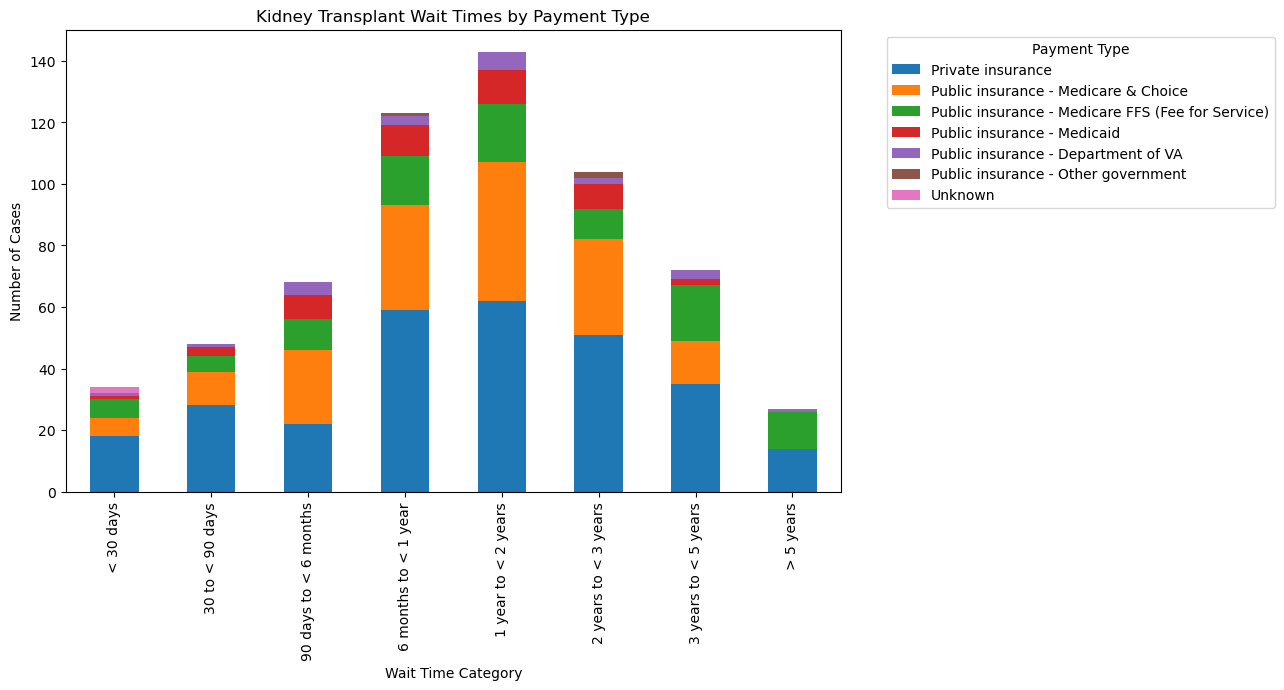

In [23]:
# Plot above on a bar chart
# Set Payment type as the index
payment_data_for_plot = ok_payment_wait.set_index("Payment type")

# Transpose the DataFrame for easier plotting
payment_data_for_plot = payment_data_for_plot.transpose()

# Plot the bar chart
payment_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Payment Type")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Payment Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [24]:
# Creating ethnicity vs wait time dataframe

ok_ethnicity_wait = pd.DataFrame(ok_totals1[["Ethnicity","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_ethnicity_wait

,Ethnicity,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1068,"White, Non-Hispanic",19,25,35,63,77,55,35,11
1075,"Black, Non-Hispanic",5,6,15,22,25,16,18,9
1077,"American Indian/Alaska Native, Non-Hispanic",2,5,6,15,19,12,6,3
1079,Hispanic/Latino,5,6,6,15,11,13,8,3
1082,"Asian, Non-Hispanic",1,4,3,6,8,2,2,1
1083,"Multiracial, Non-Hispanic",1,2,3,2,1,7,2,0
1086,"Pacific Islander, Non-Hispanic",0,0,0,1,2,0,1,0


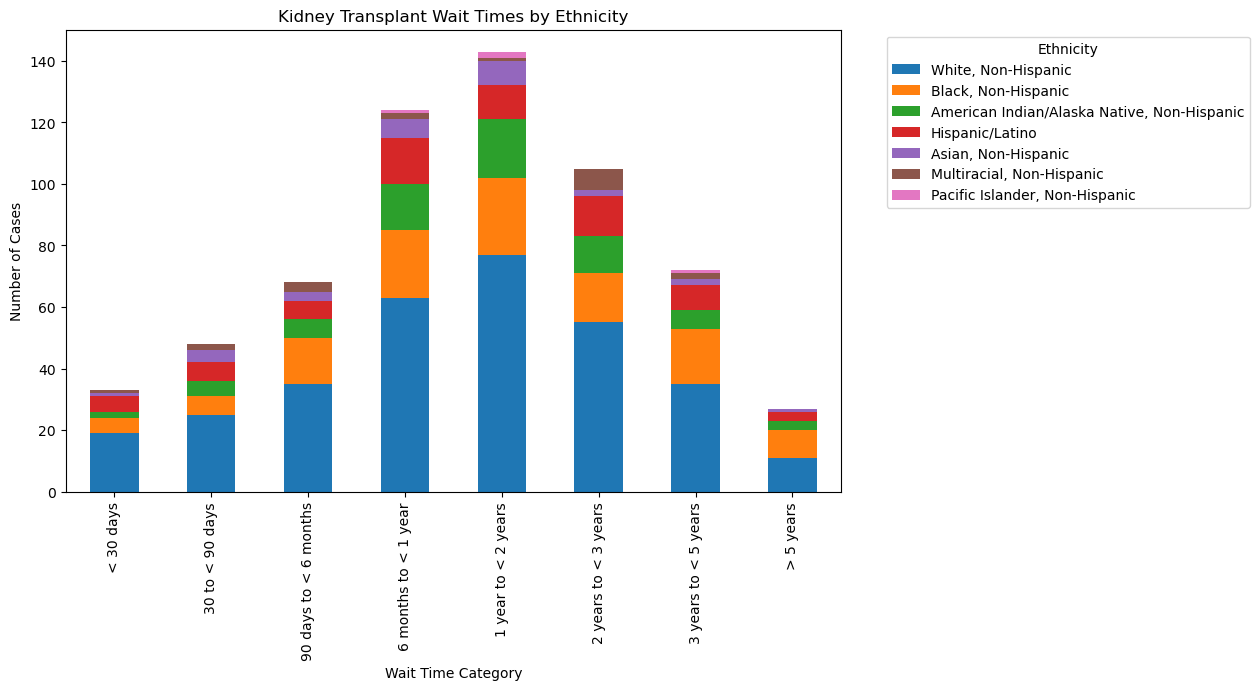

In [25]:
# Plot above on a bar chart
# Set Ethnicity as the index
ethnicity_data_for_plot = ok_ethnicity_wait.set_index("Ethnicity")

# Transpose the DataFrame for easier plotting
ethnicity_data_for_plot = ethnicity_data_for_plot.transpose()

# Plot the bar chart
ethnicity_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Ethnicity")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [28]:
# Creating age vs wait time dataframe

ok_age_wait = pd.DataFrame(ok_totals1[["Age","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_age_wait

,Age,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1070,50-64 Years,12,23,39,47,61,40,28,10
1073,65 +,8,7,13,33,37,28,21,7
1074,35-49 Years,8,10,7,30,29,22,15,10
1080,18-34 Years,3,6,9,13,15,11,8,0
1085,1-5 Years,2,1,0,0,1,2,0,0
1090,11-17 Years,0,1,0,0,0,1,0,0


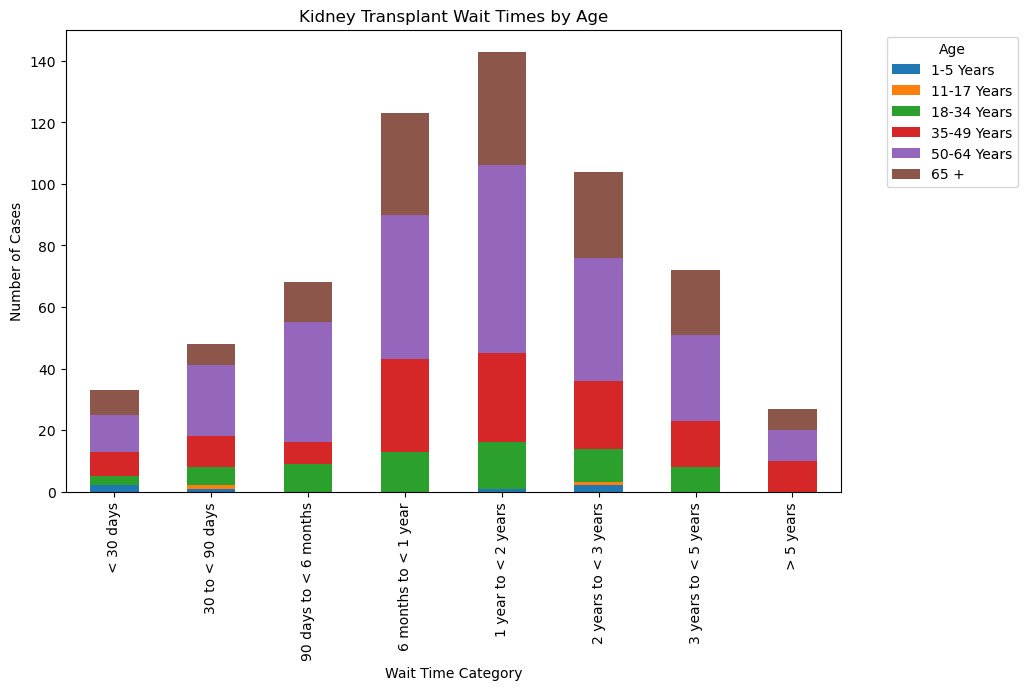

In [33]:
# Plot above on a bar chart
# Set 'Age' as the index
age_data_for_plot = ok_age_wait.set_index("Age")

# Specify the desired order of ages
ordered_ages = ["1-5 Years", "11-17 Years", "18-34 Years", "35-49 Years", "50-64 Years", "65 +"]

# Reorder the rows based on the desired order
age_data_for_plot = age_data_for_plot.loc[desired_age_order]

# Transpose the DataFrame for easier plotting
age_data_for_plot = age_data_for_plot.transpose()

# Plot the bar chart
age_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Age")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()